In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")  

In [2]:
class color:    
    GREEN, RED = '\033[92m', '\033[91m'
    BOLD, UNDERLINE, END = '\033[1m', '\033[4m', '\033[0m'
    GREEN_BOLD = GREEN + BOLD
    RED_BOLD = RED + BOLD
    GREEN_BOLD_UND = GREEN_BOLD + UNDERLINE   
    
rb, gb,  = color.RED_BOLD, color.GREEN_BOLD
gbu, end = color.GREEN_BOLD_UND, color.END

In [3]:
dataset = pd.read_csv("netflix dataset")

In [4]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,31-01-2022,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,01-02-2022,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,02-02-2022,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,03-02-2022,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [6]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [7]:
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,31-01-2022,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,01-02-2022,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,02-02-2022,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,03-02-2022,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,04-02-2022,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [8]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [9]:
dataset["Date"] = pd.to_datetime(dataset["Date"])
print (dataset.dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


In [10]:
dataset["Year"] = dataset["Date"].apply(lambda x : str(x)[:4])
dataset["Month"] = dataset["Date"].apply(lambda x : str(x)[5:7])
dataset["Day"] = dataset["Date"].apply(lambda x : str(x)[8:10])


In [11]:
dataset.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2018-05-02,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018,05,02
1,2018-06-02,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018,06,02
2,2018-07-02,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018,07,02


In [12]:
print(f'{rb}Total number of trading days: {end}{gbu}{dataset.shape[0]}{end}')
print(f'{rb}Total number of fields: {end}{gbu}{dataset.shape[1]}{end}')
print('\n')

Total number of trading days: 1009
Total number of fields: 10




In [13]:
print(f'{rb}Null values: {end}{gbu}{dataset.isnull().values.sum()}{end}')
print(f'{rb}NA values: {end}{gbu}{dataset.isna().values.any()}{end}')

Null values: 0
NA values: False


In [14]:
import pandas as pd
dataset = pd.DataFrame({'Open': dataset['Open'].values})
dataset['Open'] = dataset['Open'].values.reshape(-1, 1)


In [15]:
import numpy as np
dataset_train = np.array(dataset[:int(dataset.shape[0] * 0.8)])
dataset_test = np.array(dataset[int(dataset.shape[0] * 0.8):])


In [16]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = scaler.fit_transform(dataset)

In [17]:
# Function to create dataset for LSTM
def create_dataset(df, look_back=50):
    x, y = [], []
    for i in range(look_back, df.shape[0]):
        x.append(df[i-look_back:i, 0])
        y.append(df[i, 0])
    return np.array(x), np.array(y)

In [18]:
# Create train and test datasets
train_size = int(len(dataset_scaled) * 0.8)
train_data, test_data = dataset_scaled[0:train_size, :], dataset_scaled[train_size:len(dataset_scaled), :]

In [19]:
# Create sequences for LSTM
look_back = 50  # Adjust as needed
x_train, y_train = create_dataset(train_data, look_back)
x_test, y_test = create_dataset(test_data, look_back)


In [20]:
# Reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
# Build LSTM model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(units=256, return_sequences=True), input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=256, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=256)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 50, 512)           528384    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 50, 512)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 50, 512)           1574912   
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 50, 512)           0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 512)               1574912   
 onal)                                                           
                                                        

In [23]:
model.compile(loss='mean_squared_error', optimizer='adam')


In [24]:
# Define callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

In [25]:
# Compile model
from keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0005)
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [26]:
epochs = 100  # Increase epochs
batch_size = 64
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=1)


Epoch 1/100
12/12 [==============================] - 24s 1s/step - loss: 0.0238 - val_loss: 0.0171
Epoch 2/100
12/12 [==============================] - 20s 2s/step - loss: 0.0042 - val_loss: 0.0163
Epoch 3/100
12/12 [==============================] - 22s 2s/step - loss: 0.0029 - val_loss: 0.0110
Epoch 4/100
12/12 [==============================] - 22s 2s/step - loss: 0.0023 - val_loss: 0.0088
Epoch 5/100
12/12 [==============================] - 24s 2s/step - loss: 0.0022 - val_loss: 0.0064
Epoch 6/100
12/12 [==============================] - 25s 2s/step - loss: 0.0019 - val_loss: 0.0065
Epoch 7/100
12/12 [==============================] - 24s 2s/step - loss: 0.0021 - val_loss: 0.0055
Epoch 8/100
12/12 [==============================] - 25s 2s/step - loss: 0.0020 - val_loss: 0.0050
Epoch 9/100
12/12 [==============================] - 25s 2s/step - loss: 0.0018 - val_loss: 0.0058
Epoch 10/100
12/12 [==============================] - 24s 2s/step - loss: 0.0017 - val_loss: 0.0059
Epoch 11/

In [27]:
# Evaluate model
train_loss = model.evaluate(x_train, y_train, verbose=0)
test_loss = model.evaluate(x_test, y_test, verbose=0)
print(f'Train Loss: {train_loss:.4f}')
print(f'Test Loss: {test_loss:.4f}')

Train Loss: 0.0006
Test Loss: 0.0023


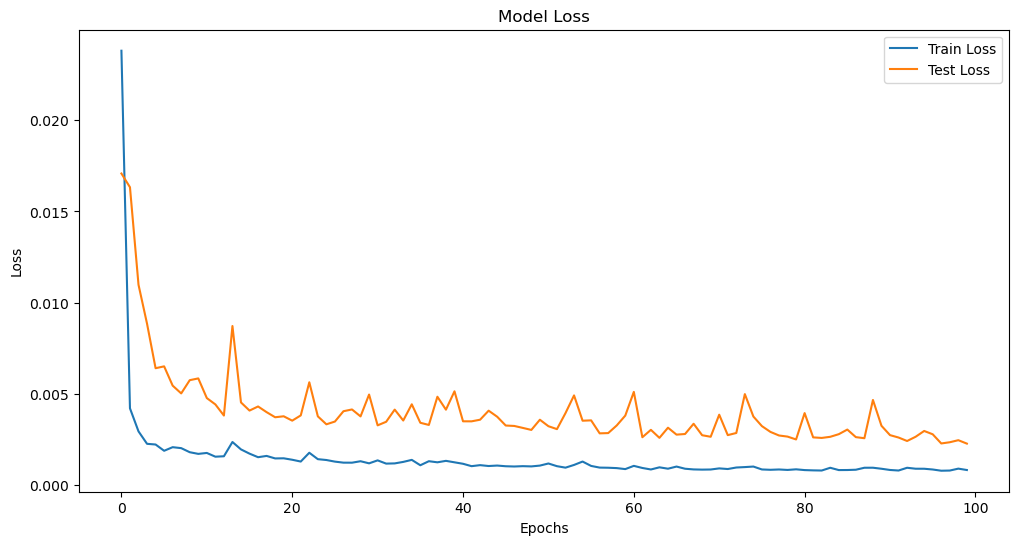

In [28]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
model.save('stock_prediction.h5')


In [30]:
model = load_model('stock_prediction.h5')


In [31]:
# Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

5/5 [==============================] - 2s 162ms/step


<Figure size 2000x1000 with 0 Axes>

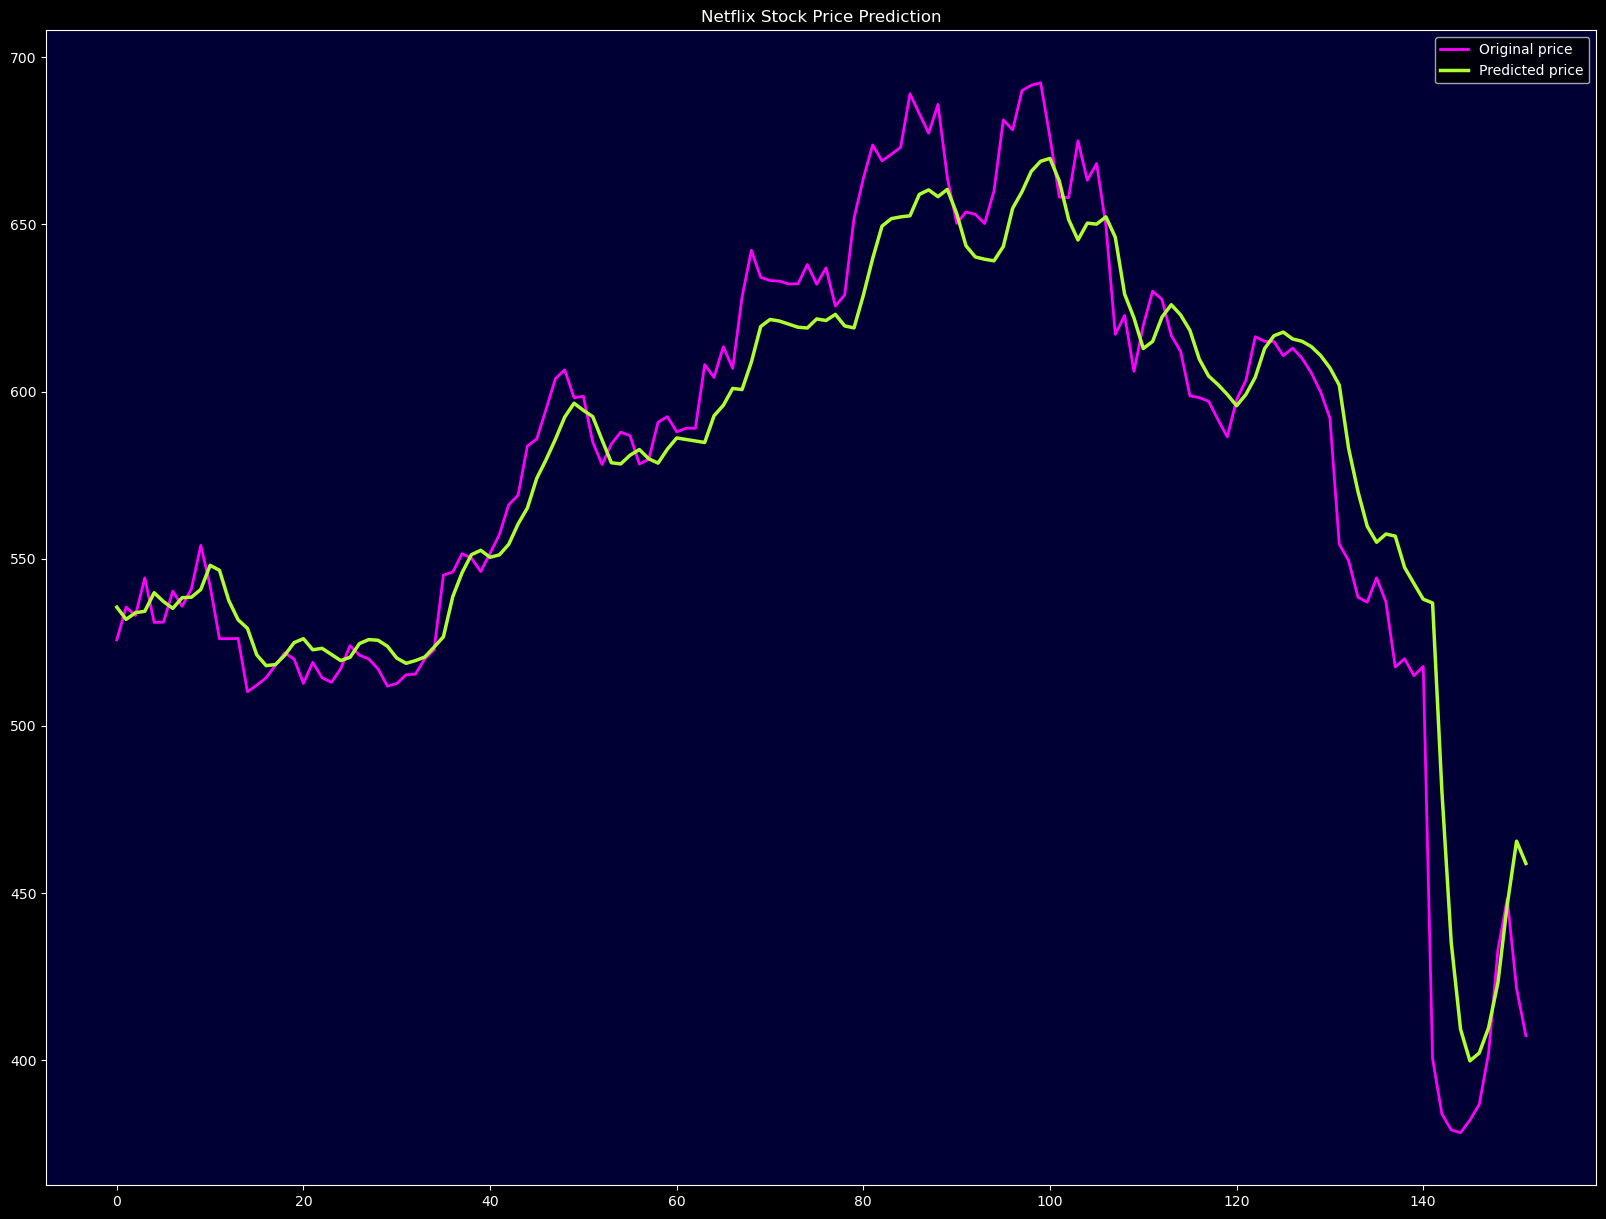

In [37]:
# Plot results
plt.figure(figsize=(20, 10))
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(20,15))
ax.set_facecolor('#000035')
ax.plot(y_test_scaled, color='fuchsia', linewidth=2, label='Original price')
plt.plot(predictions, color='greenyellow', linewidth=2.5, label='Predicted price')
plt.title('Netflix Stock Price Prediction')
plt.legend()
plt.show()